<a href="https://colab.research.google.com/github/manlowtech/Deep_Learning/blob/main/Data_Preprocessing_Titanic_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.48162

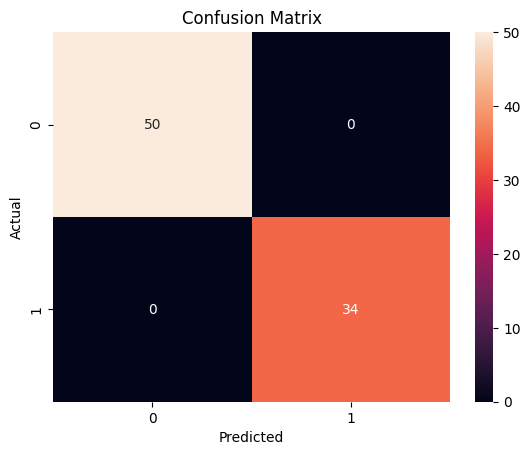

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Titanic dataset

df = pd.read_csv('tested.csv')

# Explore the dataset
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Data Cleaning
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop irrelevant features
df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

# Feature Engineering
# Create a new feature for family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Convert 'Sex' to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-Hot Encoding for 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Define features and target variable
X = df.drop(['Survived', 'Name', 'PassengerId'], axis=1)  # Features
y = df['Survived']                                       # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for preprocessing
numerical_features = ['Age', 'Fare', 'FamilySize']
categorical_features = ['Sex', 'Embarked_Q', 'Embarked_S']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a complete pipeline with the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', LogisticRegression())])

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Print the accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()